# Installing Pytorch

In [0]:
# google colab does not come with torch installed. And also, in course we are using torch 0.4. 
# so following snippet of code installs the relevant version

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


tcmalloc: large alloc 1073750016 bytes == 0x58c24000 @  0x7f8d276652a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


# Try to import PIL and install PIL

In [0]:
import PIL
import os
kill=False
print("La version est : ",PIL.PILLOW_VERSION)

if PIL.PILLOW_VERSION =="4.0.0":
  !pip uninstall -y Pillow
  !pip install Pillow==5.3.0
  # import the new one
  import PIL
  print("La version est : ",PIL.PILLOW_VERSION)
  # this should print 5.3.0. If it doesn't, then restart your runtime:
  # Menu > Runtime > Restart Runtime
  if PIL.PILLOW_VERSION =="4.0.0":
    os.kill(os.getpid(), 9)

La version est :  5.3.0


# Get Flower Data

In [0]:
!wget -nc https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!unzip -n flower_data.zip >null
!wget -nc https://raw.githubusercontent.com/udacity/pytorch_challenge/master/cat_to_name.json
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

File ‘flower_data.zip’ already there; not retrieving.

File ‘cat_to_name.json’ already there; not retrieving.



# Imports

In [0]:
# Imports here
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import matplotlib.pyplot as plt

# Data directories

In [0]:
data_dir = 'flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

# Creating data loaders

In [0]:

# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 25
# Validation set size
valid_size= 0.1

# TODO: Define your transforms for the training and validation sets

train_transforms = transforms.Compose([transforms.RandomRotation(45),
                                       transforms.ColorJitter(brightness=0.3,saturation=0.2),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_data = datasets.ImageFolder(train_dir, transform=test_transforms)
test_data = datasets.ImageFolder(valid_dir, transform=test_transforms)


#Validation portion 
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


# TODO: Using the image datasets and the trainforms, define the dataloaders

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           sampler=train_sampler,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                           sampler=valid_sampler, num_workers=num_workers)

print("Training size : ",len(train_loader))
print("Validation size : ",len(valid_loader))
print("Testing size : ",len(test_loader))
print(train_data.class_to_idx)


Training size :  236
Validation size :  27
Testing size :  33
{'1': 0, '10': 1, '100': 2, '101': 3, '102': 4, '11': 5, '12': 6, '13': 7, '14': 8, '15': 9, '16': 10, '17': 11, '18': 12, '19': 13, '2': 14, '20': 15, '21': 16, '22': 17, '23': 18, '24': 19, '25': 20, '26': 21, '27': 22, '28': 23, '29': 24, '3': 25, '30': 26, '31': 27, '32': 28, '33': 29, '34': 30, '35': 31, '36': 32, '37': 33, '38': 34, '39': 35, '4': 36, '40': 37, '41': 38, '42': 39, '43': 40, '44': 41, '45': 42, '46': 43, '47': 44, '48': 45, '49': 46, '5': 47, '50': 48, '51': 49, '52': 50, '53': 51, '54': 52, '55': 53, '56': 54, '57': 55, '58': 56, '59': 57, '6': 58, '60': 59, '61': 60, '62': 61, '63': 62, '64': 63, '65': 64, '66': 65, '67': 66, '68': 67, '69': 68, '7': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '8': 80, '80': 81, '81': 82, '82': 83, '83': 84, '84': 85, '85': 86, '86': 87, '87': 88, '88': 89, '89': 90, '9': 91, '90': 92, '91': 93, '92': 94, '93

# Create Pretrained Model

In [0]:
model = models.densenet161(pretrained=True)

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [0]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

# Building the classifier part

In [0]:
# TODO: Build your network
#Freezing the parameters
for param in model.parameters():
    param.requires_grad = False

class Network(nn.Module):
  def __init__(self,n_hidden1=1024,n_hidden2=512):
    super().__init__()
    
    self.fc1=nn.Linear(2208,n_hidden1)
    self.relu1=nn.ReLU()
    self.fc2=nn.Linear(n_hidden1,n_hidden2)
    self.relu2=nn.ReLU()
    #self.fc3=nn.Linear(n_hidden2,n_hidden3)
    #self.relu3=nn.ReLU()
    self.output=nn.Linear(n_hidden2,102)
    self.dropout=nn.Dropout(p=0.25)
    
  def forward(self,x):
    
    x=self.relu1(self.fc1(x))
    x=self.dropout(x)
    x=self.relu2(self.fc2(x))
    x=self.dropout(x)
    #x=self.relu3(self.fc3(x))
    #x=self.dropout(x)
    x=self.output(x)
    #x=F.log_softmax(x,dim=1)
    
    return x
  
model.classifier=Network()
model=model.cuda()

# Defining save and load model

In [0]:
# TODO: Train your network
def save_model(model,minimum_loss,filename):
  st=model.state_dict()
  torch.save({"minloss":minimum_loss,"state":st},filename)
  
def load_model(filename):
  return torch.load(filename)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
'''
model.load_state_dict(load_model("/content/min_densenet161_0.6997023820877075.pt"))
model=model.cuda()
optimizer=optim.Adam(model.classifier.parameters(),lr=0.005)
model

'''


'\nmodel.load_state_dict(load_model("/content/min_densenet161_0.6997023820877075.pt"))\nmodel=model.cuda()\noptimizer=optim.Adam(model.classifier.parameters(),lr=0.005)\nmodel\n\n'

# Import drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Training the network

In [0]:
import time
def trainCEL(model,n_epochs,train_loader,valid_loader,learning_rate=0.01,opt="SGD",cont=False,modelPath=None,freeze=True,N_EPOCHS_TO_UNFREEZE=30):
  minimum_loss=np.inf
  if(cont):
    chpt=load_model(modelPath)
    model.load_state_dict(chpt["state"])
    minimum_loss=chpt["minloss"]
  
  #Freeze logic
  parameters_to_train = model.classifier.parameters()
  if freeze:
    for param in model.parameters():
      param.requires_grad = False
    for param in model.classifier.parameters():
      param.requires_grad = True
  else:
    for param in model.parameters():
      param.requires_grad = True
    parameters_to_train=model.parameters()
      
      
      
  criterion = nn.CrossEntropyLoss()
  if opt=="Adam":
    optimizer=optim.Adam(parameters_to_train,lr=learning_rate)
  elif opt=="SGD":
    optimizer=optim.SGD(parameters_to_train,lr=learning_rate,momentum=0.9)
  scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
  model.train()
  plot_training_loss=[]
  plot_validation_loss=[]
  plot_accuracy=[]
  plot_lr=[]
  startTime=time.time()
  for e in range(n_epochs):
    if not freeze:
      if((e+1)==N_EPOCHS_TO_UNFREEZE):
        for param in model.parameters():
          param.requires_grad = False
        for param in model.classifier.parameters():
          param.requires_grad = True
        if opt=="Adam":
          optimizer=optim.Adam(model.classifier.parameters(),lr=learning_rate)
        elif opt=="SGD":
          optimizer=optim.SGD(model.classifier.parameters(),lr=learning_rate,momentum=0.9)
      
      
    running_loss=0
    step=0
    startEpoch=time.time()
    for images,labels in train_loader:
      #move variables to GPU
      images,labels = images.cuda(),labels.cuda()

      optimizer.zero_grad()
      #forward
      output=model(images)
      #calculate loss
      loss=criterion(output,labels)
      #backpropagate
      loss.backward()
      #update weights
      optimizer.step()
      #accumulate loss
      running_loss+=loss.item()
      step+=1
      if(step%25 ==0):
        print(f"Epoch {e+1} , Batch {step}/{len(train_loader)} Loss:{loss} Running time Epoch: {time.time()-startEpoch:.3f} s, Running Time: {time.time()-startTime:.3f} s")

    running_loss/=len(train_loader)
    #add to the list to plot
    plot_training_loss.append(running_loss)
    
    #Validation part 
    validation_loss=0
    accuracy=0

    model.eval()
    with torch.no_grad():
        for images,labels in valid_loader:
          #move variables to GPU
          images,labels = images.cuda(),labels.cuda()

          #forward
          output=model(images)
          #calculate loss
          loss=criterion(output,labels)

          #calculate validation loss 
          validation_loss+=loss.item()
          #calculate accuracy
          ps=F.softmax(output,dim=1)
          top_p,top_c= ps.topk(1,dim=1)
          equals= labels == top_c.view(*labels.shape)
          accuracy+= equals.type(torch.FloatTensor).mean()


        validation_loss/=len(valid_loader)
        accuracy/=len(valid_loader)
        #add to the list to plot
        plot_validation_loss.append(validation_loss)
        
        scheduler.step(validation_loss)
        
        plot_lr.append(get_lr(optimizer))
        
        plot_accuracy.append(accuracy)
        
        better=False
        if validation_loss<minimum_loss:
          minimum_loss=validation_loss
          save_model(model,minimum_loss,"/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_suite_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_{0:.3f}.pt".format(accuracy))
          better=True

    model.train()
    print(f"======>Epoch {e+1} Finished , TLoss:{running_loss} VLoss :{validation_loss} Accuracy : {accuracy} Better : {better} Time taken: {time.time() -startEpoch}")
    ax=plt.figure()
    t=ax.add_subplot(3,1,1)
    t.plot(plot_validation_loss,label="Validation loss")
    t.plot(plot_training_loss,label="Training loss")
    plt.legend()

    v=ax.add_subplot(3,1,2)
    v.plot(plot_accuracy,label="Accuracy")
    plt.legend()
    
    l=ax.add_subplot(3,1,3)
    l.plot(plot_lr,label="Learning Rate")
    
    plt.legend()
    plt.show()

# Launch the training phase

In [0]:
trainCEL(model,80,train_loader,valid_loader,learning_rate=0.01,opt="SGD",freeze=False,N_EPOCHS_TO_UNFREEZE=30)

# Testing 

In [0]:
model=model.cuda()
model.eval()
chpt=load_model("/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_suite_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_0.997.pt")
criterion=nn.CrossEntropyLoss()
model.load_state_dict(chpt["state"])
testing_loss=0
testing_accuracy=0
with torch.no_grad():
  for images,labels in test_loader:
    #move variables to GPU
    images,labels = images.cuda(),labels.cuda()

    #forward
    output=model(images)
    #calculate loss
    loss=criterion(output,labels)

    #calculate validation loss 
    testing_loss+=loss.item()
    #calculate accuracy
    ps=F.softmax(output,dim=1)
    top_p,top_c= ps.topk(1,dim=1)
    equals= labels == top_c.view(*labels.shape)
    testing_accuracy+= equals.type(torch.FloatTensor).mean()


  testing_loss/=len(test_loader)
  testing_accuracy/=len(test_loader)

print(f"Testing Loss : {testing_loss} Testing_accuracy : {testing_accuracy}")

Testing Loss : 0.13984823896345921 Testing_accuracy : 0.9806058406829834


In [0]:

model=model.cuda()
model.eval()
chpt=load_model("/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_0.990.pt")
criterion=nn.CrossEntropyLoss()
model.load_state_dict(chpt["state"])
testing_loss=0
testing_accuracy=0
with torch.no_grad():
  for images,labels in test_loader:
    #move variables to GPU
    images,labels = images.cuda(),labels.cuda()

    #forward
    output=model(images)
    #calculate loss
    loss=criterion(output,labels)

    #calculate validation loss 
    testing_loss+=loss.item()
    #calculate accuracy
    ps=F.softmax(output,dim=1)
    top_p,top_c= ps.topk(1,dim=1)
    equals= labels == top_c.view(*labels.shape)
    testing_accuracy+= equals.type(torch.FloatTensor).mean()


  testing_loss/=len(test_loader)
  testing_accuracy/=len(test_loader)

print(f"Testing Loss : {testing_loss} Testing_accuracy : {testing_accuracy}")

Testing Loss : 0.1375008976779625 Testing_accuracy : 0.975757360458374


# Testing error for each class

In [0]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))
train_on_gpu=True
model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(target.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(102):
    if class_total[i] > 0:
        print('Test Accuracy of %2d %5s: %2d%% (%2d/%2d)' % (i+1,
            cat_to_name["{}".format(i+1)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (cat_to_name["{}".format(i+1)]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.126587

Test Accuracy of  1 pink primrose: 100% ( 8/ 8)
Test Accuracy of  2 hard-leaved pocket orchid: 100% ( 4/ 4)
Test Accuracy of  3 canterbury bells: 100% ( 6/ 6)
Test Accuracy of  4 sweet pea: 100% ( 5/ 5)
Test Accuracy of  5 english marigold: 100% ( 6/ 6)
Test Accuracy of  6 tiger lily: 100% (10/10)
Test Accuracy of  7 moon orchid: 100% ( 5/ 5)
Test Accuracy of  8 bird of paradise: 100% ( 5/ 5)
Test Accuracy of  9 monkshood: 100% ( 1/ 1)
Test Accuracy of 10 globe thistle: 100% ( 7/ 7)
Test Accuracy of 11 snapdragon: 100% ( 2/ 2)
Test Accuracy of 12 colt's foot: 100% (16/16)
Test Accuracy of 13 king protea: 100% (11/11)
Test Accuracy of 14 spear thistle: 75% ( 3/ 4)
Test Accuracy of 15 yellow iris: 100% ( 6/ 6)
Test Accuracy of 16 globe-flower: 100% ( 7/ 7)
Test Accuracy of 17 purple coneflower: 100% ( 4/ 4)
Test Accuracy of 18 peruvian lily: 100% ( 8/ 8)
Test Accuracy of 19 balloon flower: 100% (12/12)
Test Accuracy of 20 giant white arum lily: 100% ( 5/ 5)
Test Accu

# Try to classify a bunch of images

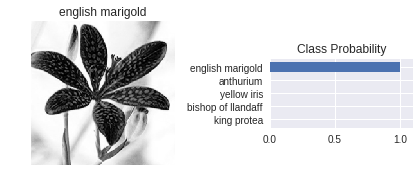

In [0]:
import numpy as np
def view_classify(img, ps,labels,k,title):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 224, 224).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(k), ps)
    ax1.set_title(title)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(k))
    ax2.set_yticklabels(labels, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
dataiter = iter(test_loader)
dataiter.next()
images, labels = dataiter.next()
images,labels = images.cuda(),labels.cuda()
idx=0
img = images[idx].cpu()
lbl=labels[idx].cpu()

ps=torch.softmax(model(images),dim=1)
top_p,top_c= ps.topk(5,dim=1)

top_p,top_c=top_p[idx].cpu(),top_c[idx].cpu()

ll=[]
for a in top_c:
  ll.append(cat_to_name["{}".format(a.item()+1)])
ll=ll[::-1]

inv_idx = torch.arange(top_p.size(0)-1, -1, -1).long()
top_p = top_p[inv_idx]

view_classify(img,top_p,ll,5,cat_to_name["{}".format(lbl.item()+1)])

Epoch 1 , Batch 25/236 Loss:0.003573722904548049 Running time Epoch: 17.851 s, Running Time: 17.851 s
Epoch 1 , Batch 50/236 Loss:0.2013917863368988 Running time Epoch: 33.308 s, Running Time: 33.308 s
Epoch 1 , Batch 75/236 Loss:0.13086815178394318 Running time Epoch: 48.735 s, Running Time: 48.735 s
Epoch 1 , Batch 100/236 Loss:0.26702040433883667 Running time Epoch: 64.251 s, Running Time: 64.251 s
Epoch 1 , Batch 125/236 Loss:0.14393463730812073 Running time Epoch: 79.923 s, Running Time: 79.923 s
Epoch 1 , Batch 150/236 Loss:0.053139038383960724 Running time Epoch: 95.321 s, Running Time: 95.321 s
Epoch 1 , Batch 175/236 Loss:0.054620057344436646 Running time Epoch: 110.865 s, Running Time: 110.865 s
Epoch 1 , Batch 200/236 Loss:0.10345672816038132 Running time Epoch: 126.428 s, Running Time: 126.428 s
Epoch 1 , Batch 225/236 Loss:0.0131586454808712 Running time Epoch: 142.438 s, Running Time: 142.438 s
======>Epoch 1 Finished , TLoss:0.1482029902951997 VLoss :0.014833052372985642

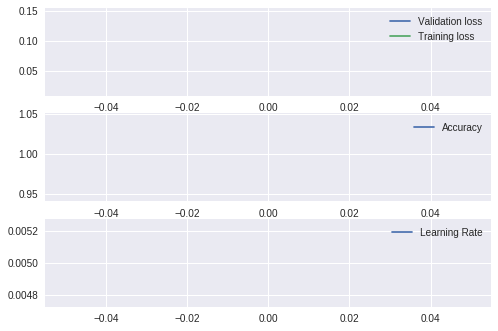

Epoch 2 , Batch 25/236 Loss:0.28304141759872437 Running time Epoch: 19.375 s, Running Time: 183.188 s
Epoch 2 , Batch 50/236 Loss:0.09996267408132553 Running time Epoch: 34.898 s, Running Time: 198.712 s
Epoch 2 , Batch 75/236 Loss:0.04022285342216492 Running time Epoch: 50.482 s, Running Time: 214.296 s
Epoch 2 , Batch 100/236 Loss:0.008926162496209145 Running time Epoch: 65.442 s, Running Time: 229.255 s
Epoch 2 , Batch 125/236 Loss:0.19473609328269958 Running time Epoch: 81.379 s, Running Time: 245.193 s
Epoch 2 , Batch 150/236 Loss:0.11722324043512344 Running time Epoch: 97.138 s, Running Time: 260.952 s
Epoch 2 , Batch 175/236 Loss:0.020649604499340057 Running time Epoch: 112.439 s, Running Time: 276.252 s
Epoch 2 , Batch 200/236 Loss:0.29913604259490967 Running time Epoch: 127.562 s, Running Time: 291.376 s
Epoch 2 , Batch 225/236 Loss:0.45760899782180786 Running time Epoch: 143.029 s, Running Time: 306.843 s
======>Epoch 2 Finished , TLoss:0.13957997447893938 VLoss :0.0117440895

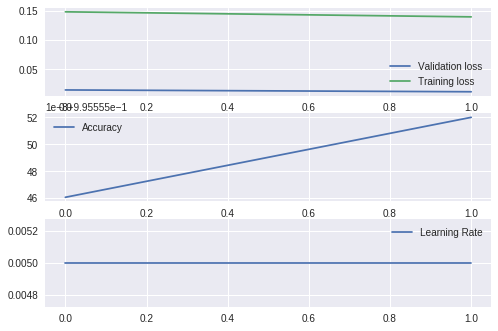

Epoch 3 , Batch 25/236 Loss:0.03481822833418846 Running time Epoch: 18.474 s, Running Time: 347.728 s
Epoch 3 , Batch 50/236 Loss:0.0742947980761528 Running time Epoch: 33.963 s, Running Time: 363.217 s
Epoch 3 , Batch 75/236 Loss:0.17192383110523224 Running time Epoch: 49.904 s, Running Time: 379.159 s
Epoch 3 , Batch 100/236 Loss:0.32942917943000793 Running time Epoch: 64.950 s, Running Time: 394.204 s
Epoch 3 , Batch 125/236 Loss:0.2121109962463379 Running time Epoch: 80.363 s, Running Time: 409.617 s
Epoch 3 , Batch 150/236 Loss:0.16543102264404297 Running time Epoch: 96.020 s, Running Time: 425.274 s
Epoch 3 , Batch 175/236 Loss:0.24904443323612213 Running time Epoch: 111.564 s, Running Time: 440.818 s
Epoch 3 , Batch 200/236 Loss:0.001208724919706583 Running time Epoch: 127.135 s, Running Time: 456.389 s
Epoch 3 , Batch 225/236 Loss:0.06821374595165253 Running time Epoch: 142.810 s, Running Time: 472.064 s
======>Epoch 3 Finished , TLoss:0.13963493390899928 VLoss :0.0133567563072

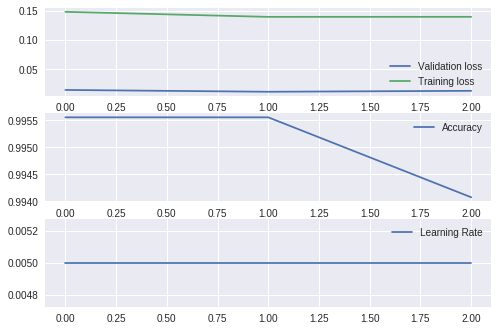

Epoch 4 , Batch 25/236 Loss:0.07767228782176971 Running time Epoch: 17.754 s, Running Time: 511.098 s
Epoch 4 , Batch 50/236 Loss:0.3383786678314209 Running time Epoch: 32.908 s, Running Time: 526.252 s
Epoch 4 , Batch 75/236 Loss:0.16391611099243164 Running time Epoch: 48.301 s, Running Time: 541.645 s
Epoch 4 , Batch 100/236 Loss:0.009869690053164959 Running time Epoch: 64.306 s, Running Time: 557.650 s
Epoch 4 , Batch 125/236 Loss:0.1009945273399353 Running time Epoch: 79.979 s, Running Time: 573.323 s
Epoch 4 , Batch 150/236 Loss:0.17210930585861206 Running time Epoch: 95.209 s, Running Time: 588.553 s
Epoch 4 , Batch 175/236 Loss:0.0964060053229332 Running time Epoch: 110.628 s, Running Time: 603.972 s
Epoch 4 , Batch 200/236 Loss:0.001075210515409708 Running time Epoch: 126.349 s, Running Time: 619.693 s
Epoch 4 , Batch 225/236 Loss:0.3537977635860443 Running time Epoch: 141.574 s, Running Time: 634.918 s
======>Epoch 4 Finished , TLoss:0.15523455379211631 VLoss :0.01561528545129

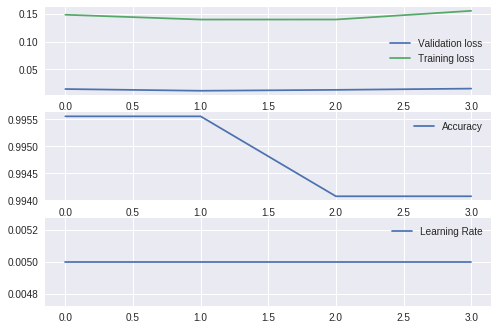

Epoch 5 , Batch 25/236 Loss:0.02310619316995144 Running time Epoch: 17.505 s, Running Time: 673.620 s
Epoch 5 , Batch 50/236 Loss:0.007352638058364391 Running time Epoch: 33.704 s, Running Time: 689.819 s
Epoch 5 , Batch 75/236 Loss:0.012185364030301571 Running time Epoch: 49.163 s, Running Time: 705.278 s
Epoch 5 , Batch 100/236 Loss:0.39086100459098816 Running time Epoch: 64.191 s, Running Time: 720.306 s
Epoch 5 , Batch 125/236 Loss:0.012044448405504227 Running time Epoch: 79.750 s, Running Time: 735.865 s
Epoch 5 , Batch 150/236 Loss:0.07521472871303558 Running time Epoch: 95.541 s, Running Time: 751.656 s
Epoch 5 , Batch 175/236 Loss:0.268442302942276 Running time Epoch: 110.573 s, Running Time: 766.688 s
Epoch 5 , Batch 200/236 Loss:0.5674288272857666 Running time Epoch: 126.657 s, Running Time: 782.772 s
Epoch 5 , Batch 225/236 Loss:0.00019729614723473787 Running time Epoch: 142.061 s, Running Time: 798.176 s
======>Epoch 5 Finished , TLoss:0.12797305297875536 VLoss :0.006831619

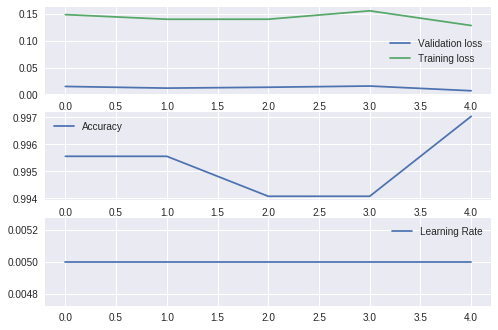

Epoch 6 , Batch 25/236 Loss:0.01695333421230316 Running time Epoch: 18.442 s, Running Time: 838.192 s
Epoch 6 , Batch 50/236 Loss:0.4361133575439453 Running time Epoch: 33.940 s, Running Time: 853.690 s
Epoch 6 , Batch 75/236 Loss:0.05664234235882759 Running time Epoch: 49.096 s, Running Time: 868.845 s
Epoch 6 , Batch 100/236 Loss:0.021403349936008453 Running time Epoch: 64.308 s, Running Time: 884.058 s
Epoch 6 , Batch 125/236 Loss:0.24496440589427948 Running time Epoch: 80.261 s, Running Time: 900.011 s
Epoch 6 , Batch 150/236 Loss:0.10937612503767014 Running time Epoch: 96.064 s, Running Time: 915.814 s
Epoch 6 , Batch 175/236 Loss:0.0818132758140564 Running time Epoch: 111.132 s, Running Time: 930.882 s
Epoch 6 , Batch 200/236 Loss:0.11660968512296677 Running time Epoch: 126.504 s, Running Time: 946.254 s
Epoch 6 , Batch 225/236 Loss:0.0011011505266651511 Running time Epoch: 142.115 s, Running Time: 961.865 s
======>Epoch 6 Finished , TLoss:0.13512302734075016 VLoss :0.00793380394

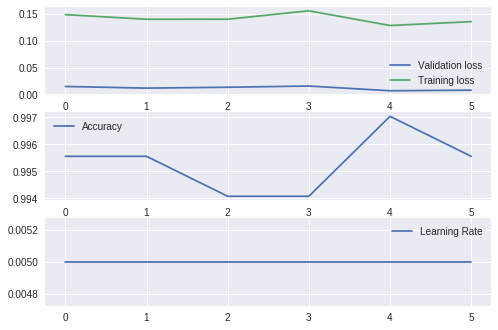

Epoch 7 , Batch 25/236 Loss:0.05254438519477844 Running time Epoch: 18.244 s, Running Time: 1001.193 s
Epoch 7 , Batch 50/236 Loss:0.13282857835292816 Running time Epoch: 33.075 s, Running Time: 1016.024 s
Epoch 7 , Batch 75/236 Loss:0.12241998314857483 Running time Epoch: 48.854 s, Running Time: 1031.803 s
Epoch 7 , Batch 100/236 Loss:0.34352684020996094 Running time Epoch: 64.723 s, Running Time: 1047.672 s
Epoch 7 , Batch 125/236 Loss:0.015316734090447426 Running time Epoch: 80.791 s, Running Time: 1063.740 s
Epoch 7 , Batch 150/236 Loss:0.007204513531178236 Running time Epoch: 96.307 s, Running Time: 1079.256 s
Epoch 7 , Batch 175/236 Loss:0.0014653396792709827 Running time Epoch: 111.821 s, Running Time: 1094.770 s
Epoch 7 , Batch 200/236 Loss:0.27211058139801025 Running time Epoch: 127.249 s, Running Time: 1110.198 s
Epoch 7 , Batch 225/236 Loss:0.07018899917602539 Running time Epoch: 142.933 s, Running Time: 1125.882 s
======>Epoch 7 Finished , TLoss:0.12876897786258792 VLoss :0

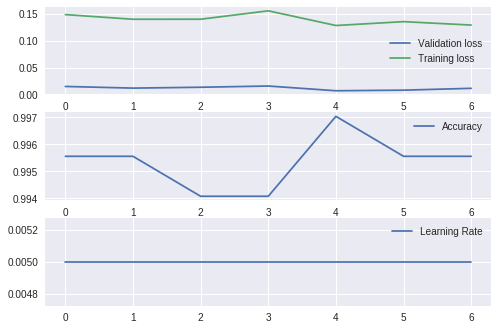

Epoch 8 , Batch 25/236 Loss:0.18340742588043213 Running time Epoch: 17.544 s, Running Time: 1163.958 s
Epoch 8 , Batch 50/236 Loss:0.17383991181850433 Running time Epoch: 33.008 s, Running Time: 1179.421 s
Epoch 8 , Batch 75/236 Loss:0.0073680877685546875 Running time Epoch: 48.501 s, Running Time: 1194.914 s
Epoch 8 , Batch 100/236 Loss:0.0006642532534897327 Running time Epoch: 64.027 s, Running Time: 1210.441 s
Epoch 8 , Batch 125/236 Loss:0.12961526215076447 Running time Epoch: 79.584 s, Running Time: 1225.998 s
Epoch 8 , Batch 150/236 Loss:0.016877364367246628 Running time Epoch: 95.504 s, Running Time: 1241.918 s
Epoch 8 , Batch 175/236 Loss:0.07262378931045532 Running time Epoch: 110.766 s, Running Time: 1257.179 s
Epoch 8 , Batch 200/236 Loss:0.10245317220687866 Running time Epoch: 126.317 s, Running Time: 1272.730 s
Epoch 8 , Batch 225/236 Loss:0.056189555674791336 Running time Epoch: 142.511 s, Running Time: 1288.924 s
======>Epoch 8 Finished , TLoss:0.1316939389402312 VLoss :

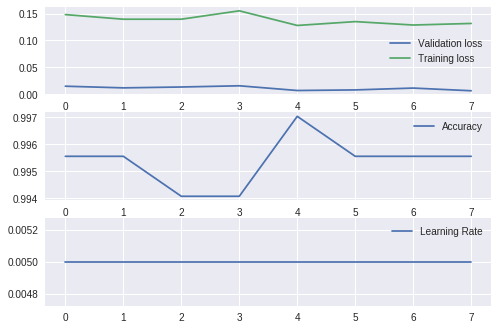

Epoch 9 , Batch 25/236 Loss:0.2446778416633606 Running time Epoch: 18.086 s, Running Time: 1328.372 s
Epoch 9 , Batch 50/236 Loss:0.003712272737175226 Running time Epoch: 33.859 s, Running Time: 1344.145 s
Epoch 9 , Batch 75/236 Loss:0.04392879456281662 Running time Epoch: 49.138 s, Running Time: 1359.424 s
Epoch 9 , Batch 100/236 Loss:0.01456092856824398 Running time Epoch: 64.626 s, Running Time: 1374.912 s
Epoch 9 , Batch 125/236 Loss:0.21008901298046112 Running time Epoch: 80.640 s, Running Time: 1390.926 s
Epoch 9 , Batch 150/236 Loss:0.0747155174612999 Running time Epoch: 96.048 s, Running Time: 1406.334 s
Epoch 9 , Batch 175/236 Loss:0.06752333045005798 Running time Epoch: 111.721 s, Running Time: 1422.007 s
Epoch 9 , Batch 200/236 Loss:0.26183539628982544 Running time Epoch: 126.967 s, Running Time: 1437.253 s
Epoch 9 , Batch 225/236 Loss:0.0532977469265461 Running time Epoch: 142.665 s, Running Time: 1452.951 s
======>Epoch 9 Finished , TLoss:0.11847910442668501 VLoss :0.01236

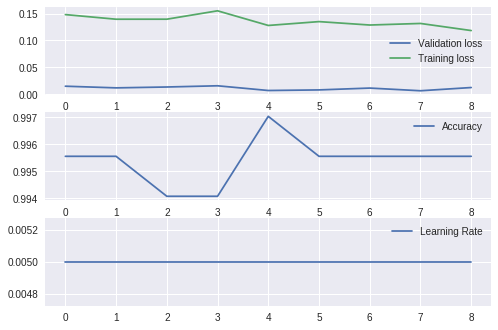

Epoch 10 , Batch 25/236 Loss:0.22758667171001434 Running time Epoch: 17.517 s, Running Time: 1491.337 s
Epoch 10 , Batch 50/236 Loss:0.0029702759347856045 Running time Epoch: 33.625 s, Running Time: 1507.445 s
Epoch 10 , Batch 75/236 Loss:0.01752624474465847 Running time Epoch: 48.807 s, Running Time: 1522.627 s
Epoch 10 , Batch 100/236 Loss:0.19973984360694885 Running time Epoch: 64.514 s, Running Time: 1538.334 s
Epoch 10 , Batch 125/236 Loss:0.3483448028564453 Running time Epoch: 80.364 s, Running Time: 1554.184 s
Epoch 10 , Batch 150/236 Loss:0.06105604022741318 Running time Epoch: 95.729 s, Running Time: 1569.549 s
Epoch 10 , Batch 175/236 Loss:0.34987080097198486 Running time Epoch: 111.161 s, Running Time: 1584.981 s
Epoch 10 , Batch 200/236 Loss:0.14547578990459442 Running time Epoch: 126.340 s, Running Time: 1600.160 s
Epoch 10 , Batch 225/236 Loss:0.21113532781600952 Running time Epoch: 142.288 s, Running Time: 1616.108 s
======>Epoch 10 Finished , TLoss:0.138941115858423 VLo

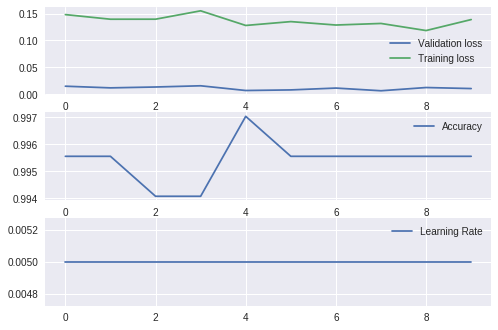

Epoch 11 , Batch 25/236 Loss:0.0037068938836455345 Running time Epoch: 18.157 s, Running Time: 1654.997 s
Epoch 11 , Batch 50/236 Loss:0.017382584512233734 Running time Epoch: 33.853 s, Running Time: 1670.693 s
Epoch 11 , Batch 75/236 Loss:0.23325717449188232 Running time Epoch: 49.353 s, Running Time: 1686.193 s
Epoch 11 , Batch 100/236 Loss:0.019476719200611115 Running time Epoch: 64.780 s, Running Time: 1701.620 s
Epoch 11 , Batch 125/236 Loss:0.10876665264368057 Running time Epoch: 80.728 s, Running Time: 1717.568 s
Epoch 11 , Batch 150/236 Loss:0.04859424754977226 Running time Epoch: 95.582 s, Running Time: 1732.422 s
Epoch 11 , Batch 175/236 Loss:0.2925197184085846 Running time Epoch: 111.037 s, Running Time: 1747.877 s
Epoch 11 , Batch 200/236 Loss:0.14747077226638794 Running time Epoch: 126.317 s, Running Time: 1763.157 s
Epoch 11 , Batch 225/236 Loss:0.029531516134738922 Running time Epoch: 142.511 s, Running Time: 1779.351 s
======>Epoch 11 Finished , TLoss:0.1066160491707520

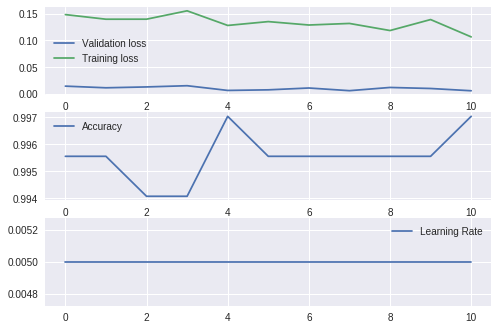

Epoch 12 , Batch 25/236 Loss:0.19209961593151093 Running time Epoch: 18.169 s, Running Time: 1818.862 s
Epoch 12 , Batch 50/236 Loss:0.01396106742322445 Running time Epoch: 33.757 s, Running Time: 1834.451 s
Epoch 12 , Batch 75/236 Loss:0.12869848310947418 Running time Epoch: 49.836 s, Running Time: 1850.529 s
Epoch 12 , Batch 100/236 Loss:0.06711146980524063 Running time Epoch: 65.250 s, Running Time: 1865.943 s
Epoch 12 , Batch 125/236 Loss:0.18916036188602448 Running time Epoch: 81.234 s, Running Time: 1881.928 s
Epoch 12 , Batch 150/236 Loss:0.010125693865120411 Running time Epoch: 96.233 s, Running Time: 1896.926 s
Epoch 12 , Batch 175/236 Loss:0.009871482849121094 Running time Epoch: 112.118 s, Running Time: 1912.811 s
Epoch 12 , Batch 200/236 Loss:0.03247608244419098 Running time Epoch: 127.122 s, Running Time: 1927.815 s
Epoch 12 , Batch 225/236 Loss:0.005396576132625341 Running time Epoch: 143.208 s, Running Time: 1943.901 s
======>Epoch 12 Finished , TLoss:0.1303971859233262 

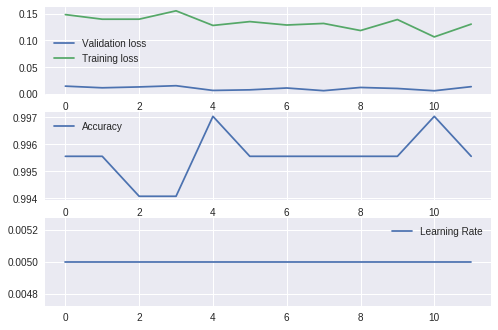

Epoch 13 , Batch 25/236 Loss:0.057398244738578796 Running time Epoch: 17.370 s, Running Time: 1982.063 s
Epoch 13 , Batch 50/236 Loss:0.0066901398822665215 Running time Epoch: 33.276 s, Running Time: 1997.969 s
Epoch 13 , Batch 75/236 Loss:0.0013879012549296021 Running time Epoch: 48.864 s, Running Time: 2013.557 s
Epoch 13 , Batch 100/236 Loss:0.0964723601937294 Running time Epoch: 64.720 s, Running Time: 2029.413 s
Epoch 13 , Batch 125/236 Loss:0.0033981322776526213 Running time Epoch: 80.744 s, Running Time: 2045.437 s
Epoch 13 , Batch 150/236 Loss:0.028472328558564186 Running time Epoch: 96.443 s, Running Time: 2061.136 s
Epoch 13 , Batch 175/236 Loss:0.002508621197193861 Running time Epoch: 112.213 s, Running Time: 2076.906 s
Epoch 13 , Batch 200/236 Loss:0.1442643404006958 Running time Epoch: 128.045 s, Running Time: 2092.738 s
Epoch 13 , Batch 225/236 Loss:0.09339048713445663 Running time Epoch: 143.928 s, Running Time: 2108.621 s
======>Epoch 13 Finished , TLoss:0.1176556163076

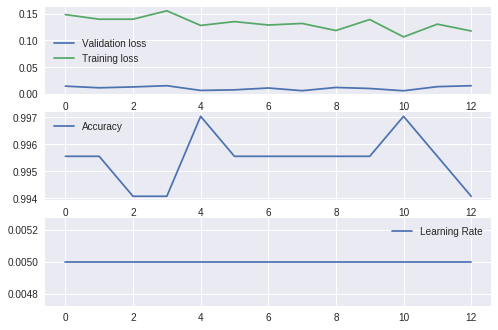

Epoch 14 , Batch 25/236 Loss:0.046997737139463425 Running time Epoch: 17.460 s, Running Time: 2146.761 s
Epoch 14 , Batch 50/236 Loss:0.0010679626138880849 Running time Epoch: 33.827 s, Running Time: 2163.128 s
Epoch 14 , Batch 75/236 Loss:0.21480894088745117 Running time Epoch: 48.986 s, Running Time: 2178.287 s
Epoch 14 , Batch 100/236 Loss:0.15711399912834167 Running time Epoch: 64.732 s, Running Time: 2194.033 s
Epoch 14 , Batch 125/236 Loss:0.08769941329956055 Running time Epoch: 80.311 s, Running Time: 2209.613 s
Epoch 14 , Batch 150/236 Loss:0.01553779561072588 Running time Epoch: 96.612 s, Running Time: 2225.913 s
Epoch 14 , Batch 175/236 Loss:0.16705287992954254 Running time Epoch: 111.690 s, Running Time: 2240.991 s
Epoch 14 , Batch 200/236 Loss:0.0014503097627311945 Running time Epoch: 126.746 s, Running Time: 2256.047 s
Epoch 14 , Batch 225/236 Loss:0.007004165556281805 Running time Epoch: 142.186 s, Running Time: 2271.487 s
======>Epoch 14 Finished , TLoss:0.12127408620326

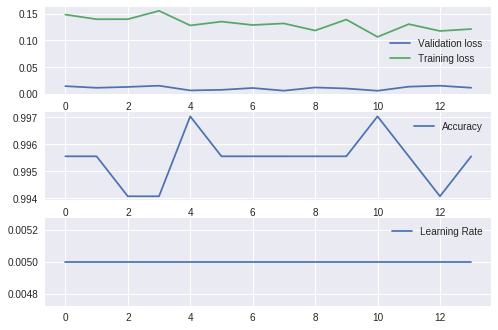

Epoch 15 , Batch 25/236 Loss:0.05320674926042557 Running time Epoch: 18.150 s, Running Time: 2310.721 s
Epoch 15 , Batch 50/236 Loss:0.008846969343721867 Running time Epoch: 33.693 s, Running Time: 2326.264 s
Epoch 15 , Batch 75/236 Loss:0.0016601562965661287 Running time Epoch: 49.377 s, Running Time: 2341.948 s
Epoch 15 , Batch 100/236 Loss:0.02673051878809929 Running time Epoch: 64.535 s, Running Time: 2357.106 s
Epoch 15 , Batch 125/236 Loss:0.07974733412265778 Running time Epoch: 81.202 s, Running Time: 2373.774 s
Epoch 15 , Batch 150/236 Loss:0.01780952513217926 Running time Epoch: 96.476 s, Running Time: 2389.048 s
Epoch 15 , Batch 175/236 Loss:0.006219672970473766 Running time Epoch: 111.762 s, Running Time: 2404.333 s
Epoch 15 , Batch 200/236 Loss:0.07903348654508591 Running time Epoch: 127.324 s, Running Time: 2419.895 s
Epoch 15 , Batch 225/236 Loss:0.03224681690335274 Running time Epoch: 143.036 s, Running Time: 2435.608 s
======>Epoch 15 Finished , TLoss:0.1115116313833098

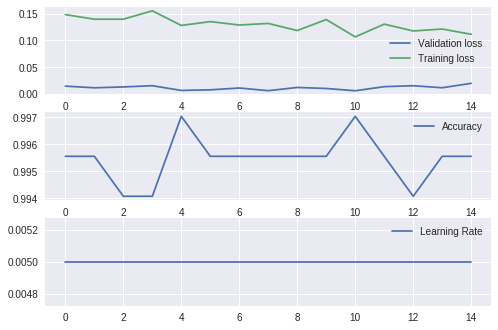

Epoch 16 , Batch 25/236 Loss:0.041441403329372406 Running time Epoch: 18.199 s, Running Time: 2474.786 s
Epoch 16 , Batch 50/236 Loss:0.015129356645047665 Running time Epoch: 33.967 s, Running Time: 2490.554 s
Epoch 16 , Batch 75/236 Loss:0.023751601576805115 Running time Epoch: 49.595 s, Running Time: 2506.182 s
Epoch 16 , Batch 100/236 Loss:0.03937263414263725 Running time Epoch: 64.823 s, Running Time: 2521.410 s
Epoch 16 , Batch 125/236 Loss:0.11730024218559265 Running time Epoch: 80.093 s, Running Time: 2536.680 s
Epoch 16 , Batch 150/236 Loss:0.16046056151390076 Running time Epoch: 96.050 s, Running Time: 2552.636 s
Epoch 16 , Batch 175/236 Loss:0.04409359022974968 Running time Epoch: 111.212 s, Running Time: 2567.798 s
Epoch 16 , Batch 200/236 Loss:0.4621223509311676 Running time Epoch: 126.431 s, Running Time: 2583.018 s
Epoch 16 , Batch 225/236 Loss:0.017133483663201332 Running time Epoch: 142.299 s, Running Time: 2598.886 s
======>Epoch 16 Finished , TLoss:0.11655804479004613

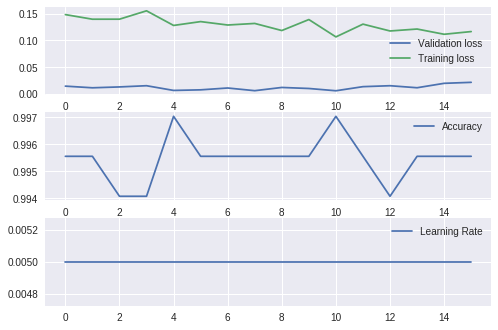

Epoch 17 , Batch 25/236 Loss:0.002677345182746649 Running time Epoch: 17.551 s, Running Time: 2637.200 s
Epoch 17 , Batch 50/236 Loss:0.0033023834694176912 Running time Epoch: 32.880 s, Running Time: 2652.529 s
Epoch 17 , Batch 75/236 Loss:0.004743995610624552 Running time Epoch: 49.194 s, Running Time: 2668.843 s
Epoch 17 , Batch 100/236 Loss:0.018891334533691406 Running time Epoch: 64.892 s, Running Time: 2684.541 s
Epoch 17 , Batch 125/236 Loss:0.051381245255470276 Running time Epoch: 80.956 s, Running Time: 2700.605 s
Epoch 17 , Batch 150/236 Loss:0.004802398849278688 Running time Epoch: 96.165 s, Running Time: 2715.814 s
Epoch 17 , Batch 175/236 Loss:0.06619609892368317 Running time Epoch: 111.492 s, Running Time: 2731.141 s
Epoch 17 , Batch 200/236 Loss:0.16948115825653076 Running time Epoch: 126.489 s, Running Time: 2746.138 s
Epoch 17 , Batch 225/236 Loss:0.366476833820343 Running time Epoch: 142.418 s, Running Time: 2762.067 s
======>Epoch 17 Finished , TLoss:0.119796065368988

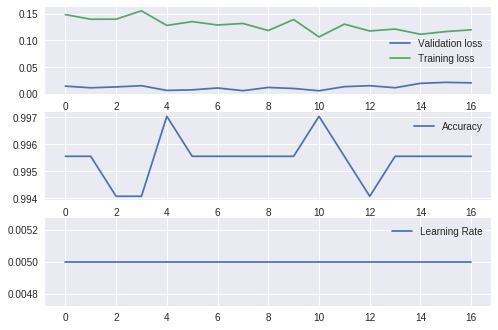

Epoch 18 , Batch 25/236 Loss:0.4615088403224945 Running time Epoch: 17.390 s, Running Time: 2800.369 s
Epoch 18 , Batch 50/236 Loss:0.02336830087006092 Running time Epoch: 32.872 s, Running Time: 2815.851 s
Epoch 18 , Batch 75/236 Loss:0.09899581968784332 Running time Epoch: 48.563 s, Running Time: 2831.542 s
Epoch 18 , Batch 100/236 Loss:0.21290969848632812 Running time Epoch: 63.853 s, Running Time: 2846.832 s
Epoch 18 , Batch 125/236 Loss:0.07492545992136002 Running time Epoch: 80.060 s, Running Time: 2863.039 s
Epoch 18 , Batch 150/236 Loss:0.2344530075788498 Running time Epoch: 95.331 s, Running Time: 2878.310 s
Epoch 18 , Batch 175/236 Loss:0.14616619050502777 Running time Epoch: 110.709 s, Running Time: 2893.688 s
Epoch 18 , Batch 200/236 Loss:0.16446353495121002 Running time Epoch: 126.398 s, Running Time: 2909.377 s
Epoch 18 , Batch 225/236 Loss:0.04871860519051552 Running time Epoch: 142.440 s, Running Time: 2925.419 s
======>Epoch 18 Finished , TLoss:0.1062003082086726 VLoss

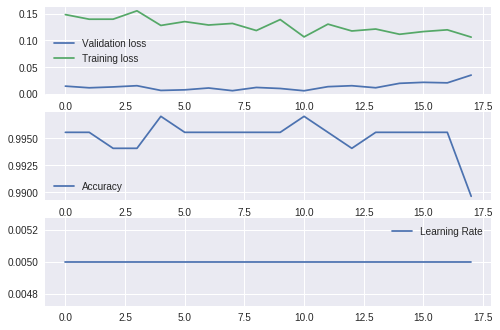

Epoch 19 , Batch 25/236 Loss:0.0004669952322728932 Running time Epoch: 17.564 s, Running Time: 2963.710 s
Epoch 19 , Batch 50/236 Loss:0.005623741075396538 Running time Epoch: 33.017 s, Running Time: 2979.163 s
Epoch 19 , Batch 75/236 Loss:0.3558467626571655 Running time Epoch: 48.961 s, Running Time: 2995.107 s
Epoch 19 , Batch 100/236 Loss:0.07867401093244553 Running time Epoch: 64.663 s, Running Time: 3010.809 s
Epoch 19 , Batch 125/236 Loss:0.0007182693225331604 Running time Epoch: 80.182 s, Running Time: 3026.328 s
Epoch 19 , Batch 150/236 Loss:0.3004246950149536 Running time Epoch: 96.109 s, Running Time: 3042.255 s
Epoch 19 , Batch 175/236 Loss:0.15976668894290924 Running time Epoch: 111.274 s, Running Time: 3057.420 s
Epoch 19 , Batch 200/236 Loss:0.547269344329834 Running time Epoch: 126.698 s, Running Time: 3072.844 s
Epoch 19 , Batch 225/236 Loss:0.02525615692138672 Running time Epoch: 142.685 s, Running Time: 3088.831 s
======>Epoch 19 Finished , TLoss:0.1133315333185453 VL

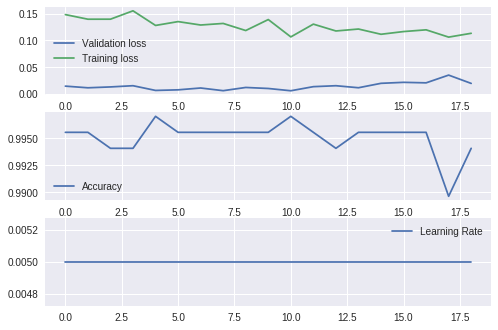

Epoch 20 , Batch 25/236 Loss:0.05019574984908104 Running time Epoch: 17.590 s, Running Time: 3127.324 s
Epoch 20 , Batch 50/236 Loss:0.12431138753890991 Running time Epoch: 32.511 s, Running Time: 3142.245 s
Epoch 20 , Batch 75/236 Loss:0.295804500579834 Running time Epoch: 48.427 s, Running Time: 3158.161 s
Epoch 20 , Batch 100/236 Loss:0.20566068589687347 Running time Epoch: 64.577 s, Running Time: 3174.311 s
Epoch 20 , Batch 125/236 Loss:0.1376708596944809 Running time Epoch: 80.116 s, Running Time: 3189.850 s
Epoch 20 , Batch 150/236 Loss:0.019421540200710297 Running time Epoch: 95.340 s, Running Time: 3205.074 s
Epoch 20 , Batch 175/236 Loss:0.1143328845500946 Running time Epoch: 111.416 s, Running Time: 3221.150 s
Epoch 20 , Batch 200/236 Loss:0.011857300065457821 Running time Epoch: 127.025 s, Running Time: 3236.759 s
Epoch 20 , Batch 225/236 Loss:0.00019096375035587698 Running time Epoch: 142.835 s, Running Time: 3252.569 s
======>Epoch 20 Finished , TLoss:0.12427472509822202 V

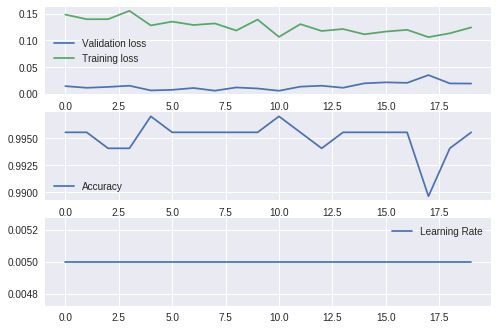

Epoch 21 , Batch 25/236 Loss:0.0714353546500206 Running time Epoch: 17.954 s, Running Time: 3291.187 s
Epoch 21 , Batch 50/236 Loss:0.18276767432689667 Running time Epoch: 33.390 s, Running Time: 3306.623 s
Epoch 21 , Batch 75/236 Loss:0.21448789536952972 Running time Epoch: 48.597 s, Running Time: 3321.830 s
Epoch 21 , Batch 100/236 Loss:0.033043134957551956 Running time Epoch: 64.160 s, Running Time: 3337.393 s
Epoch 21 , Batch 125/236 Loss:0.251758337020874 Running time Epoch: 80.050 s, Running Time: 3353.283 s
Epoch 21 , Batch 150/236 Loss:0.0028786086477339268 Running time Epoch: 95.650 s, Running Time: 3368.883 s
Epoch 21 , Batch 175/236 Loss:0.017605667933821678 Running time Epoch: 111.127 s, Running Time: 3384.360 s
Epoch 21 , Batch 200/236 Loss:0.013036194257438183 Running time Epoch: 126.070 s, Running Time: 3399.303 s
Epoch 21 , Batch 225/236 Loss:0.23102223873138428 Running time Epoch: 141.740 s, Running Time: 3414.974 s
======>Epoch 21 Finished , TLoss:0.10959747947594747 

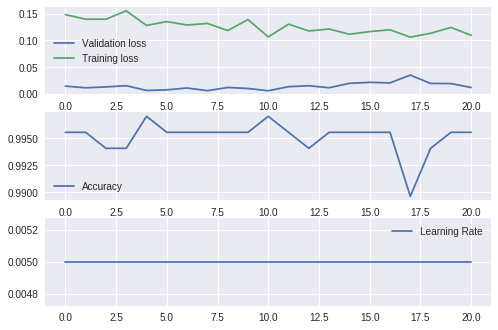

Epoch 22 , Batch 25/236 Loss:0.35885798931121826 Running time Epoch: 18.146 s, Running Time: 3454.062 s
Epoch 22 , Batch 50/236 Loss:0.19944675266742706 Running time Epoch: 33.973 s, Running Time: 3469.889 s
Epoch 22 , Batch 75/236 Loss:0.27481552958488464 Running time Epoch: 49.550 s, Running Time: 3485.466 s
Epoch 22 , Batch 100/236 Loss:0.2497563362121582 Running time Epoch: 64.611 s, Running Time: 3500.527 s
Epoch 22 , Batch 125/236 Loss:0.0017834091559052467 Running time Epoch: 80.633 s, Running Time: 3516.549 s
Epoch 22 , Batch 150/236 Loss:0.08098344504833221 Running time Epoch: 95.963 s, Running Time: 3531.879 s
Epoch 22 , Batch 175/236 Loss:0.017595786601305008 Running time Epoch: 111.404 s, Running Time: 3547.320 s
Epoch 22 , Batch 200/236 Loss:0.18403278291225433 Running time Epoch: 126.615 s, Running Time: 3562.531 s
Epoch 22 , Batch 225/236 Loss:0.5769253373146057 Running time Epoch: 142.717 s, Running Time: 3578.633 s
======>Epoch 22 Finished , TLoss:0.126589330055818 VLo

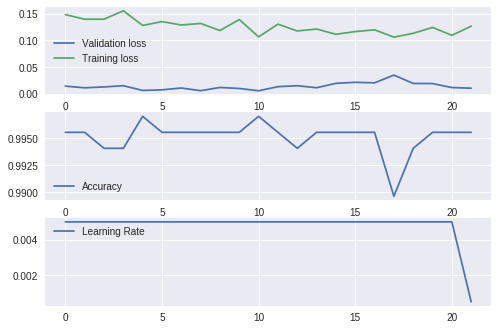

Epoch 23 , Batch 25/236 Loss:0.041736528277397156 Running time Epoch: 18.062 s, Running Time: 3617.172 s
Epoch 23 , Batch 50/236 Loss:0.3411569893360138 Running time Epoch: 33.541 s, Running Time: 3632.651 s
Epoch 23 , Batch 75/236 Loss:0.19400356709957123 Running time Epoch: 49.469 s, Running Time: 3648.579 s
Epoch 23 , Batch 100/236 Loss:0.21724644303321838 Running time Epoch: 64.833 s, Running Time: 3663.943 s
Epoch 23 , Batch 125/236 Loss:0.006154556293040514 Running time Epoch: 80.743 s, Running Time: 3679.853 s
Epoch 23 , Batch 150/236 Loss:0.0878717228770256 Running time Epoch: 95.894 s, Running Time: 3695.004 s
Epoch 23 , Batch 175/236 Loss:0.13169248402118683 Running time Epoch: 111.134 s, Running Time: 3710.244 s
Epoch 23 , Batch 200/236 Loss:0.2534835636615753 Running time Epoch: 126.785 s, Running Time: 3725.895 s
Epoch 23 , Batch 225/236 Loss:0.106892891228199 Running time Epoch: 142.681 s, Running Time: 3741.791 s
======>Epoch 23 Finished , TLoss:0.1187312784468381 VLoss 

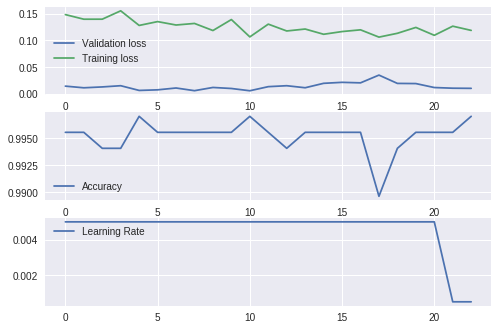

Epoch 24 , Batch 25/236 Loss:0.17569652199745178 Running time Epoch: 17.581 s, Running Time: 3780.389 s
Epoch 24 , Batch 50/236 Loss:0.0046167755499482155 Running time Epoch: 33.752 s, Running Time: 3796.560 s
Epoch 24 , Batch 75/236 Loss:0.18702174723148346 Running time Epoch: 48.871 s, Running Time: 3811.679 s
Epoch 24 , Batch 100/236 Loss:0.061365965753793716 Running time Epoch: 64.399 s, Running Time: 3827.207 s
Epoch 24 , Batch 125/236 Loss:0.0953172892332077 Running time Epoch: 80.418 s, Running Time: 3843.226 s
Epoch 24 , Batch 150/236 Loss:0.16029924154281616 Running time Epoch: 95.539 s, Running Time: 3858.347 s
Epoch 24 , Batch 175/236 Loss:0.21929368376731873 Running time Epoch: 110.893 s, Running Time: 3873.701 s
Epoch 24 , Batch 200/236 Loss:0.38599932193756104 Running time Epoch: 126.913 s, Running Time: 3889.721 s
Epoch 24 , Batch 225/236 Loss:0.005863990634679794 Running time Epoch: 143.361 s, Running Time: 3906.169 s
======>Epoch 24 Finished , TLoss:0.10067306456905992

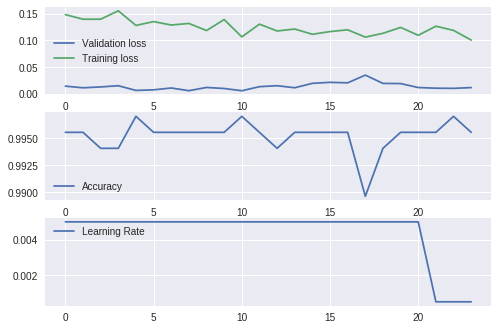

Epoch 25 , Batch 25/236 Loss:0.10768349468708038 Running time Epoch: 17.820 s, Running Time: 3944.631 s
Epoch 25 , Batch 50/236 Loss:0.34199589490890503 Running time Epoch: 33.151 s, Running Time: 3959.962 s
Epoch 25 , Batch 75/236 Loss:0.10434633493423462 Running time Epoch: 48.904 s, Running Time: 3975.715 s
Epoch 25 , Batch 100/236 Loss:0.0013864135835319757 Running time Epoch: 64.510 s, Running Time: 3991.321 s
Epoch 25 , Batch 125/236 Loss:0.17707473039627075 Running time Epoch: 81.232 s, Running Time: 4008.043 s
Epoch 25 , Batch 150/236 Loss:0.04198345169425011 Running time Epoch: 96.541 s, Running Time: 4023.352 s
Epoch 25 , Batch 175/236 Loss:0.0027972792740911245 Running time Epoch: 111.558 s, Running Time: 4038.369 s
Epoch 25 , Batch 200/236 Loss:0.007601089309900999 Running time Epoch: 126.975 s, Running Time: 4053.786 s
Epoch 25 , Batch 225/236 Loss:0.2535427212715149 Running time Epoch: 142.739 s, Running Time: 4069.550 s
======>Epoch 25 Finished , TLoss:0.1141651265468342

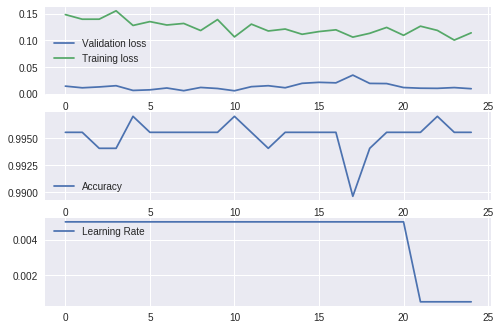

Epoch 26 , Batch 25/236 Loss:0.14563517272472382 Running time Epoch: 17.884 s, Running Time: 4108.474 s
Epoch 26 , Batch 50/236 Loss:0.0665341168642044 Running time Epoch: 33.121 s, Running Time: 4123.711 s
Epoch 26 , Batch 75/236 Loss:0.0032837677281349897 Running time Epoch: 48.272 s, Running Time: 4138.862 s
Epoch 26 , Batch 100/236 Loss:0.020686989650130272 Running time Epoch: 63.802 s, Running Time: 4154.393 s
Epoch 26 , Batch 125/236 Loss:0.1475980281829834 Running time Epoch: 79.751 s, Running Time: 4170.342 s
Epoch 26 , Batch 150/236 Loss:0.04013935104012489 Running time Epoch: 95.505 s, Running Time: 4186.095 s
Epoch 26 , Batch 175/236 Loss:0.07624957710504532 Running time Epoch: 111.061 s, Running Time: 4201.652 s
Epoch 26 , Batch 200/236 Loss:0.01839679665863514 Running time Epoch: 126.529 s, Running Time: 4217.119 s
Epoch 26 , Batch 225/236 Loss:0.24777759611606598 Running time Epoch: 142.298 s, Running Time: 4232.889 s
======>Epoch 26 Finished , TLoss:0.10789888626818461 V

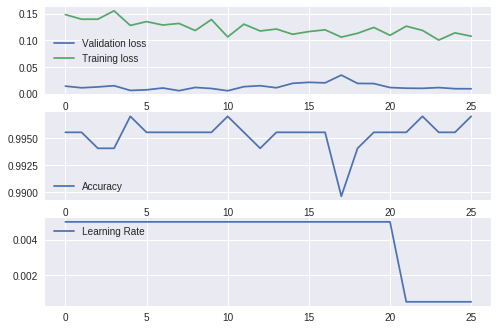

Epoch 27 , Batch 25/236 Loss:0.11829855293035507 Running time Epoch: 17.868 s, Running Time: 4271.323 s
Epoch 27 , Batch 50/236 Loss:0.20386339724063873 Running time Epoch: 33.706 s, Running Time: 4287.161 s
Epoch 27 , Batch 75/236 Loss:0.3042389750480652 Running time Epoch: 49.256 s, Running Time: 4302.711 s
Epoch 27 , Batch 100/236 Loss:0.2084088921546936 Running time Epoch: 64.269 s, Running Time: 4317.725 s
Epoch 27 , Batch 125/236 Loss:0.4059430658817291 Running time Epoch: 80.727 s, Running Time: 4334.182 s
Epoch 27 , Batch 150/236 Loss:0.35344481468200684 Running time Epoch: 96.176 s, Running Time: 4349.631 s
Epoch 27 , Batch 175/236 Loss:0.025064926594495773 Running time Epoch: 111.454 s, Running Time: 4364.909 s
Epoch 27 , Batch 200/236 Loss:0.003464660607278347 Running time Epoch: 126.790 s, Running Time: 4380.245 s
Epoch 27 , Batch 225/236 Loss:0.5731912851333618 Running time Epoch: 142.795 s, Running Time: 4396.250 s
======>Epoch 27 Finished , TLoss:0.1216126082450439 VLoss

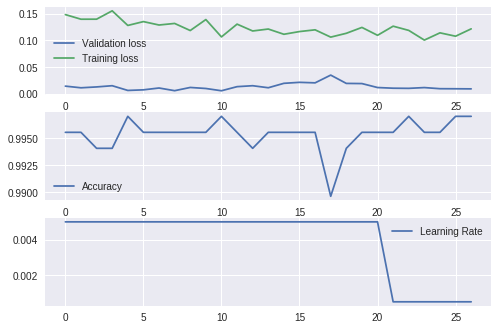

Epoch 28 , Batch 25/236 Loss:0.009767952375113964 Running time Epoch: 17.671 s, Running Time: 4434.175 s
Epoch 28 , Batch 50/236 Loss:0.008758468553423882 Running time Epoch: 33.314 s, Running Time: 4449.818 s
Epoch 28 , Batch 75/236 Loss:0.0022224807180464268 Running time Epoch: 48.577 s, Running Time: 4465.081 s
Epoch 28 , Batch 100/236 Loss:0.21843194961547852 Running time Epoch: 63.901 s, Running Time: 4480.405 s
Epoch 28 , Batch 125/236 Loss:0.0028964995872229338 Running time Epoch: 80.050 s, Running Time: 4496.553 s
Epoch 28 , Batch 150/236 Loss:0.002406463725492358 Running time Epoch: 95.763 s, Running Time: 4512.267 s
Epoch 28 , Batch 175/236 Loss:0.30525967478752136 Running time Epoch: 111.274 s, Running Time: 4527.778 s
Epoch 28 , Batch 200/236 Loss:0.0075331879779696465 Running time Epoch: 126.370 s, Running Time: 4542.874 s
Epoch 28 , Batch 225/236 Loss:0.003390693571418524 Running time Epoch: 142.247 s, Running Time: 4558.751 s
======>Epoch 28 Finished , TLoss:0.1135476772

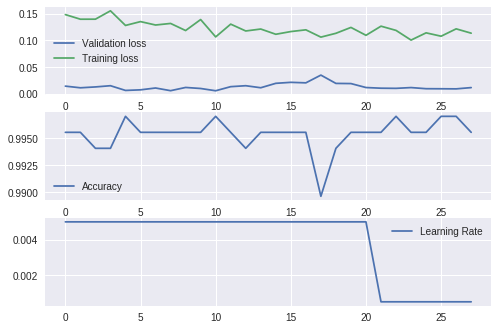

Epoch 29 , Batch 25/236 Loss:0.28365668654441833 Running time Epoch: 17.616 s, Running Time: 4596.613 s
Epoch 29 , Batch 50/236 Loss:0.09787620604038239 Running time Epoch: 33.440 s, Running Time: 4612.436 s
Epoch 29 , Batch 75/236 Loss:0.175502210855484 Running time Epoch: 49.024 s, Running Time: 4628.020 s
Epoch 29 , Batch 100/236 Loss:0.09677872061729431 Running time Epoch: 64.362 s, Running Time: 4643.358 s
Epoch 29 , Batch 125/236 Loss:0.33365151286125183 Running time Epoch: 79.483 s, Running Time: 4658.479 s
Epoch 29 , Batch 150/236 Loss:0.14006690680980682 Running time Epoch: 95.032 s, Running Time: 4674.028 s
Epoch 29 , Batch 175/236 Loss:0.4219007194042206 Running time Epoch: 110.671 s, Running Time: 4689.667 s
Epoch 29 , Batch 200/236 Loss:0.14351886510849 Running time Epoch: 126.240 s, Running Time: 4705.237 s
Epoch 29 , Batch 225/236 Loss:0.11634393781423569 Running time Epoch: 141.513 s, Running Time: 4720.510 s
======>Epoch 29 Finished , TLoss:0.11610074468897714 VLoss :0

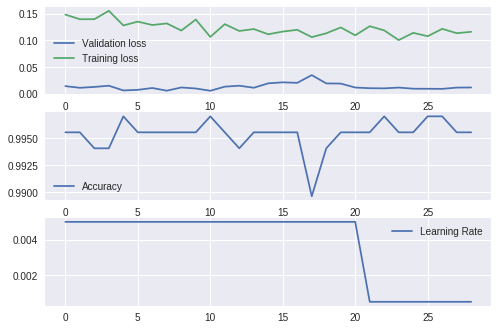

Epoch 30 , Batch 25/236 Loss:0.2628744840621948 Running time Epoch: 17.804 s, Running Time: 4759.408 s
Epoch 30 , Batch 50/236 Loss:0.006534461863338947 Running time Epoch: 33.101 s, Running Time: 4774.706 s
Epoch 30 , Batch 75/236 Loss:0.0005357360932976007 Running time Epoch: 48.590 s, Running Time: 4790.194 s
Epoch 30 , Batch 100/236 Loss:0.1452474594116211 Running time Epoch: 64.045 s, Running Time: 4805.650 s
Epoch 30 , Batch 125/236 Loss:0.3631972074508667 Running time Epoch: 80.126 s, Running Time: 4821.730 s
Epoch 30 , Batch 150/236 Loss:0.2367437481880188 Running time Epoch: 95.171 s, Running Time: 4836.775 s
Epoch 30 , Batch 175/236 Loss:0.001158065744675696 Running time Epoch: 110.513 s, Running Time: 4852.118 s
Epoch 30 , Batch 200/236 Loss:0.021543197333812714 Running time Epoch: 126.031 s, Running Time: 4867.635 s
Epoch 30 , Batch 225/236 Loss:0.2735416889190674 Running time Epoch: 141.751 s, Running Time: 4883.355 s
======>Epoch 30 Finished , TLoss:0.10973514578728423 VL

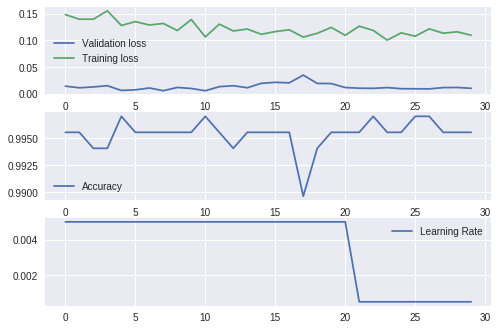

In [0]:
trainCEL(model,30,train_loader,valid_loader,learning_rate=0.005,opt="SGD",cont=True,modelPath="/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_0.990.pt")

# Testing

In [0]:

model=model.cuda()
model.eval()
chpt=load_model("/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_suite_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_0.997.pt")
criterion=nn.CrossEntropyLoss()
model.load_state_dict(chpt["state"])
testing_loss=0
testing_accuracy=0
with torch.no_grad():
  for images,labels in test_loader:
    #move variables to GPU
    images,labels = images.cuda(),labels.cuda()

    #forward
    output=model(images)
    #calculate loss
    loss=criterion(output,labels)

    #calculate validation loss 
    testing_loss+=loss.item()
    #calculate accuracy
    ps=F.softmax(output,dim=1)
    top_p,top_c= ps.topk(1,dim=1)
    equals= labels == top_c.view(*labels.shape)
    testing_accuracy+= equals.type(torch.FloatTensor).mean()


  testing_loss/=len(test_loader)
  testing_accuracy/=len(test_loader)

print(f"Testing Loss : {testing_loss} Testing_accuracy : {testing_accuracy}")

Testing Loss : 0.13984823896345921 Testing_accuracy : 0.9806058406829834


# Testing with google data

In [0]:
!wget -O google_test_data.zip "https://www.dropbox.com/s/3zmf1kq58o909rq/google_test_data.zip?dl=1"
!unzip google_test_data.zip -d data

In [0]:

!mkdir ./data
for i in range(102):
  name="{}".format(i+1)
  !mv $name "data"

mkdir: cannot create directory ‘./data’: File exists


In [0]:

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 25
# Validation set size

test_dir="data"

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder

test_data = datasets.ImageFolder(test_dir, transform=test_transforms)


test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

print("Testing size : ",len(test_loader))


Testing size :  40


In [0]:

model=model.cuda()
model.eval()
chpt=load_model("/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_suite_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_0.997.pt")
criterion=nn.CrossEntropyLoss()
model.load_state_dict(chpt["state"])
testing_loss=0
testing_accuracy=0
with torch.no_grad():
  for images,labels in test_loader:
    #move variables to GPU
    images,labels = images.cuda(),labels.cuda()

    #forward
    output=model(images)
    #calculate loss
    loss=criterion(output,labels)

    #calculate validation loss 
    testing_loss+=loss.item()
    #calculate accuracy
    ps=F.softmax(output,dim=1)
    top_p,top_c= ps.topk(1,dim=1)
    equals= labels == top_c.view(*labels.shape)
    testing_accuracy+= equals.type(torch.FloatTensor).mean()


  testing_loss/=len(test_loader)
  testing_accuracy/=len(test_loader)

print(f"Testing Loss : {testing_loss} Testing_accuracy : {testing_accuracy}")

Testing Loss : 3.337722811847925 Testing_accuracy : 0.6242915987968445


In [0]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))
train_on_gpu=True
model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(target.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(102):
    if class_total[i] > 0:
        print('Test Accuracy of %2d %5s: %2d%% (%2d/%2d)' % (i+1,
            cat_to_name["{}".format(i+1)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (cat_to_name["{}".format(i+1)]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 3.335384

Test Accuracy of  1 pink primrose: 60% ( 6/10)
Test Accuracy of  2 hard-leaved pocket orchid: 70% ( 7/10)
Test Accuracy of  3 canterbury bells: 80% ( 8/10)
Test Accuracy of  4 sweet pea: 90% ( 9/10)
Test Accuracy of  5 english marigold: 70% ( 7/10)
Test Accuracy of  6 tiger lily: 30% ( 3/10)
Test Accuracy of  7 moon orchid: 66% ( 6/ 9)
Test Accuracy of  8 bird of paradise: 80% ( 8/10)
Test Accuracy of  9 monkshood: 100% (10/10)
Test Accuracy of 10 globe thistle: 50% ( 5/10)
Test Accuracy of 11 snapdragon: 40% ( 4/10)
Test Accuracy of 12 colt's foot: 70% ( 7/10)
Test Accuracy of 13 king protea: 90% ( 9/10)
Test Accuracy of 14 spear thistle: 40% ( 4/10)
Test Accuracy of 15 yellow iris: 70% ( 7/10)
Test Accuracy of 16 globe-flower: 70% ( 7/10)
Test Accuracy of 17 purple coneflower: 60% ( 6/10)
Test Accuracy of 18 peruvian lily: 90% ( 9/10)
Test Accuracy of 19 balloon flower: 70% ( 7/10)
Test Accuracy of 20 giant white arum lily: 90% ( 9/10)
Test Accuracy of 21 fire li

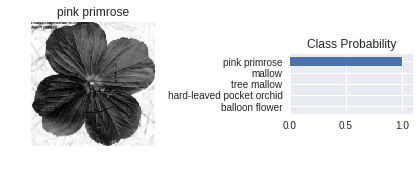

In [0]:
import numpy as np
def view_classify(img, ps,labels,k,title):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 224, 224).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(k), ps)
    ax1.set_title(title)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(k))
    ax2.set_yticklabels(labels, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
dataiter = iter(test_loader)
images, labels = dataiter.next()
images,labels = images.cuda(),labels.cuda()
idx=2
img = images[idx].cpu()
lbl=labels[idx].cpu()

ps=torch.softmax(model(images),dim=1)
top_p,top_c= ps.topk(5,dim=1)

top_p,top_c=top_p[idx].cpu(),top_c[idx].cpu()

ll=[]
for a in top_c:
  ll.append(cat_to_name["{}".format(test_data.classes[a.item()])])
ll=ll[::-1]

inv_idx = torch.arange(top_p.size(0)-1, -1, -1).long()
top_p = top_p[inv_idx]

view_classify(img,top_p,ll,5,cat_to_name["{}".format(test_data.classes[lbl.item()])])

In [0]:
!cp -r data "/content/gdrive/My Drive/data_google"

# Testing with Original Test Data

In [0]:
!mkdir originalTest
!cd originalTes

/bin/bash: line 0: cd: originalTes: No such file or directory


In [0]:
!wget -O flower_data_orginal_test.zip "https://www.dropbox.com/s/da6ye9genbsdzbq/flower_data_original_test.zip?dl=1"
!unzip flower_data_orginal_test.zip -d originalTest

--2018-12-28 23:27:10--  https://www.dropbox.com/s/da6ye9genbsdzbq/flower_data_original_test.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/da6ye9genbsdzbq/flower_data_original_test.zip [following]
--2018-12-28 23:27:11--  https://www.dropbox.com/s/dl/da6ye9genbsdzbq/flower_data_original_test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc805807b4d21d032aae212e7a5b.dl.dropboxusercontent.com/cd/0/get/AYVWOAy7llFiIDraccIn_PUUqUNUezEXepab0FoFgLcn7OeBWZ3BIqkyS2FvL2bnJI2W4TW6kkGrL8S0JNM-NnYCt43XC9LIjBhQOt1nmCmsMPppkmIGoMjfcTNbxuN8qYBbvk46R8kQlTxrEHn1RSYQcDSuYxZKR3d33FLWhGp0py8iFW9M6hj4YJJJtqsqdgM/file?dl=1 [following]
--2018-12-28 23:27:11--  https://uc805807b4d21d032aae212e7a5b.dl.dropboxusercontent.com/cd/0/ge

In [0]:
!mkdir ./originalTest
for i in range(102):
  name="{}".format(i+1)
  !mv $name "originalTest"

mkdir: cannot create directory ‘./originalTest’: File exists


In [0]:

# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 25
# Validation set size

#valid_dir="/content/gdrive/My Drive/test"
test_dir="originalTest"

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder

test_data = datasets.ImageFolder(test_dir, transform=test_transforms)


test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

print("Testing size : ",len(test_loader))


Testing size :  33


In [0]:

model=model.cuda()
model.eval()
chpt=load_model("/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_suite_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_0.997.pt")
criterion=nn.CrossEntropyLoss()
model.load_state_dict(chpt["state"])
testing_loss=0
testing_accuracy=0
with torch.no_grad():
  for images,labels in test_loader:
    #move variables to GPU
    images,labels = images.cuda(),labels.cuda()

    #forward
    output=model(images)
    #calculate loss
    loss=criterion(output,labels)

    #calculate validation loss 
    testing_loss+=loss.item()
    #calculate accuracy
    ps=F.softmax(output,dim=1)
    top_p,top_c= ps.topk(1,dim=1)
    equals= labels == top_c.view(*labels.shape)
    testing_accuracy+= equals.type(torch.FloatTensor).mean()


  testing_loss/=len(test_loader)
  testing_accuracy/=len(test_loader)

print(f"Testing Loss : {testing_loss} Testing_accuracy : {testing_accuracy}")

Testing Loss : 0.08655135280637762 Testing_accuracy : 0.9855182766914368


# Data I found

In [0]:

# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 25
# Validation set size

test_dir="/content/gdrive/My Drive/test"

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder

test_data = datasets.ImageFolder(test_dir, transform=test_transforms)


test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

print("Testing size : ",len(test_loader))


Testing size :  33


In [0]:

model=model.cuda()
model.eval()
chpt=load_model("/content/gdrive/My Drive/ColabNotebooks/densenet161/net14_suite_0.01LR-SCHPLAT_sgd_densenet161_brightness_unfrozen_0.997.pt")
criterion=nn.CrossEntropyLoss()
model.load_state_dict(chpt["state"])
testing_loss=0
testing_accuracy=0
with torch.no_grad():
  for images,labels in test_loader:
    #move variables to GPU
    images,labels = images.cuda(),labels.cuda()

    #forward
    output=model(images)
    #calculate loss
    loss=criterion(output,labels)

    #calculate validation loss 
    testing_loss+=loss.item()
    #calculate accuracy
    ps=F.softmax(output,dim=1)
    top_p,top_c= ps.topk(1,dim=1)
    equals= labels == top_c.view(*labels.shape)
    testing_accuracy+= equals.type(torch.FloatTensor).mean()


  testing_loss/=len(test_loader)
  testing_accuracy/=len(test_loader)

print(f"Testing Loss : {testing_loss} Testing_accuracy : {testing_accuracy}")

Testing Loss : 0.08655135280637762 Testing_accuracy : 0.9855182766914368


In [0]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))
train_on_gpu=True
model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(target.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(102):
    if class_total[i] > 0:
        print('Test Accuracy of %2d %5s: %2d%% (%2d/%2d)' % (i+1,
            cat_to_name["{}".format(i+1)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (cat_to_name["{}".format(i+1)]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.077533

Test Accuracy of  1 pink primrose: 100% ( 5/ 5)
Test Accuracy of  2 hard-leaved pocket orchid: 100% ( 3/ 3)
Test Accuracy of  3 canterbury bells: 100% ( 8/ 8)
Test Accuracy of  4 sweet pea: 100% ( 4/ 4)
Test Accuracy of  5 english marigold: 100% ( 6/ 6)
Test Accuracy of  6 tiger lily: 100% ( 9/ 9)
Test Accuracy of  7 moon orchid: 88% ( 8/ 9)
Test Accuracy of  8 bird of paradise: 100% ( 6/ 6)
Test Accuracy of  9 monkshood: 100% ( 3/ 3)
Test Accuracy of 10 globe thistle: 100% ( 4/ 4)
Test Accuracy of 11 snapdragon: 100% ( 3/ 3)
Test Accuracy of 12 colt's foot: 100% ( 9/ 9)
Test Accuracy of 13 king protea: 100% ( 6/ 6)
Test Accuracy of 14 spear thistle: 100% ( 7/ 7)
Test Accuracy of 15 yellow iris: 100% ( 5/ 5)
Test Accuracy of 16 globe-flower: 66% ( 2/ 3)
Test Accuracy of 17 purple coneflower: 100% ( 2/ 2)
Test Accuracy of 18 peruvian lily: 100% ( 4/ 4)
Test Accuracy of 19 balloon flower: 100% ( 7/ 7)
Test Accuracy of 20 giant white arum lily: 100% ( 2/ 2)
Test Accur